In [19]:
!pip install wget==3.2

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=964e6f7930ca1e0a8618a3f02cec3eb7fc654ad74bd1398b64910361b5054e4f
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [26]:
import wget #para dowload de arquivo web
wget.download(url='https://archive.ics.uci.edu/ml/machine-learning-databases/00312/dow_jones_index.zip', out='./dados.zip') #fazendo fowload do arquivo compactado


'./dados.zip'

In [27]:
import zipfile #para lidar com arquivos zipados
with zipfile.ZipFile(file='./dados.zip',mode = 'r') as fp:
  fp.extractall('./dados')

In [28]:
import os #para lidar com funções do sistema operacional
os.rename('./dados/dow_jones_index.data','./dados/dow_jones_index.csv')

In [30]:
import pandas as pd

df = pd.read_csv('./dados/dow_jones_index.csv')

In [31]:
df

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,XOM,5/27/2011,$80.22,$82.63,$80.07,$82.63,68230855,3.00424,-21.355713,86758820.0,$83.28,$81.18,-2.521610,75,0.568801
746,2,XOM,6/3/2011,$83.28,$83.75,$80.18,$81.18,78616295,-2.52161,15.221032,68230855.0,$80.93,$79.78,-1.420980,68,0.578960
747,2,XOM,6/10/2011,$80.93,$81.87,$79.72,$79.78,92380844,-1.42098,17.508519,78616295.0,$80.00,$79.02,-1.225000,61,0.589120
748,2,XOM,6/17/2011,$80.00,$80.82,$78.33,$79.02,100521400,-1.22500,8.811952,92380844.0,$78.65,$76.78,-2.377620,54,0.594786


In [32]:
df_coke = df[df['stock'] == 'KO']

In [34]:
df_coke = df_coke[['date','open','high','low','close']]

In [40]:
for cont in ['open','high','low','close']:
  df_coke[cont] = df_coke[cont].apply(lambda x: float(x.split(sep='$')[-1]))

AttributeError: 'float' object has no attribute 'split'

In [41]:
df_coke.dtypes

date      object
open     float64
high     float64
low      float64
close    float64
dtype: object

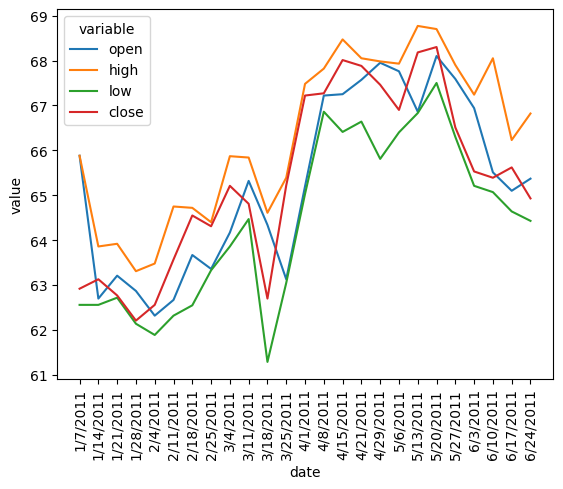

In [49]:
import seaborn as sns
plot = sns.lineplot(x ='date', y= 'value', hue= 'variable', data= pd.melt(df_coke,['date']))
plot.tick_params(axis = 'x', labelrotation = 90)